In [1]:
# % load_ext autoreload
# % autoreload 2
import os
import sys

import matplotlib as mpl

sys.path.append('../..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from config.shrinkage_o.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from util import DATASET_PATH
from viz import *
import viz

RESULTS_PATH = oj(os.path.dirname(DATASET_PATH), 'results')

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

num_datasets 11 3


In [6]:
# run comparison aggregations
!python3 "../../02_aggregate_results.py"

  0%|                                                     | 0/6 [00:00<?, ?it/s]../../02_aggregate_results.py:53: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 100.10it/s]
successfully processed 3 / 6 individual seeds
100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 23.63it/s]
successfully processed 3 / 3 averaged seeds


# overarching plots


  0%|          | 0/3 [00:00<?, ?it/s]/Users/omerronen/anaconda3/envs/imodels-experiments/lib/python3.8/site-packages/matplotlib-3.5.0-py3.8-macosx-10.9-x86_64.egg/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
 33%|███▎      | 1/3 [00:00<00:00,  9.62it/s]/Users/omerronen/anaconda3/envs/imodels-experiments/lib/python3.8/site-packages/matplotlib-3.5.0-py3.8-macosx-10.9-x86_64.egg/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/omerronen/anaconda3/envs/imodels-experiments/lib/python3.8/site-packages/matplotlib-3.5.0-py3.8-macosx-10.9-x86_64.egg/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
100%|██████████| 3/3 [00:00<00:00,  9.68it/s]


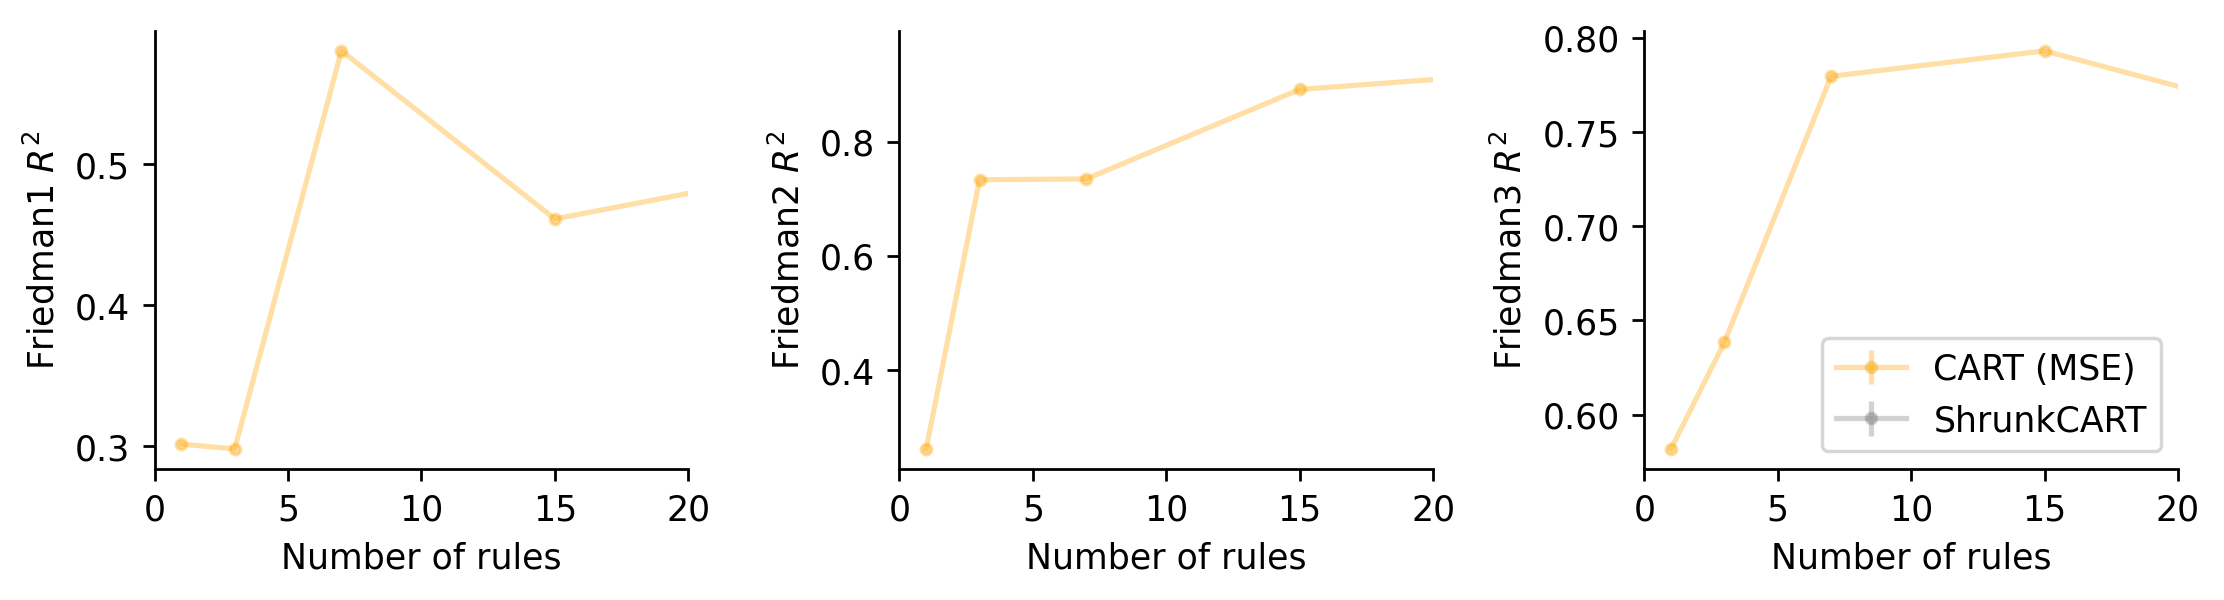

In [2]:
viz.plot_comparisons(metric='r2', datasets=DATASETS_REGRESSION,  # len(DATASETS_REGRESSION)
                     models_to_include=['ShrunkCART', 'CART_(MSE)'],
                     save_name='shrinkage-regression-reg')


  0%|          | 0/11 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/omerronen/Documents/Phd/tree_shrinkage/imodels-experiments/results/shrinkage/sonar/train-test/results_aggregated.pkl'

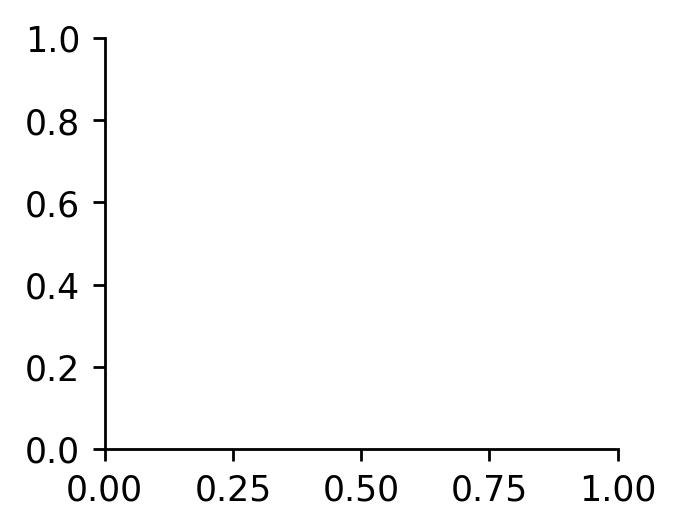

In [4]:
viz.plot_comparisons(metric='rocauc', datasets=DATASETS_CLASSIFICATION,
                     models_to_include=['CART', 'Random_Forest', 'Gradient_Boosting'],
                     save_name='shrinkage-classification')


In [ ]:
# viz.plot_comparisons(metric='r2', datasets=DATASETS_REGRESSION,
#                 models_to_include=['ShrunkCART', 'CART_(MSE)',
#                                    'Shrunk_Random_Forest', 'Random_Forest',
#                                    'Shrunk_Gradient_Boosting', 'Gradient_Boosting'],
#                      save_name='shrinkage-regression-low', data_type='low_data')

